# Maternal Smoking and Birth Weight



## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_statsmodels.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex2_birth_weight_lower",
    "ex3_smoking_coefficient",
    "ex4_smoking_coefficient",
    "ex6_compare_white_black",
    "ex6_compare_white_black_tstat",
    "ex7_predictions",
    "ex8_smoking_coefficient",
    "ex10_num_high_drug_arrest",
    "ex11_diff_in_diff",
    "ex12_diff_in_diff_weighted",
}
```


### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.


## Exercises

For these exercises, we will borrow some data and exercises from another MIDS course on Statistical Modeling:

These days, it is widely understood that mothers who smoke during pregnancy risk exposing their babies to many health problems. This was not common knowledge fifty years ago. One of the first studies that addressed the issue of pregnancy and smoking was the Child Health and Development Studies, a comprehensive study of all babies born between 1960 and 1967 at the Kaiser Foundation Hospital in Oakland, CA. The original reference for the study is Yerushalmy (1964, American Journal of Obstetrics and Gynecology, pp. 505-518). The data and a summary of the study are in Nolan and Speed (2000, Stat Labs, Chapter 10) and can be found at [the book’s website.](https://www.stat.berkeley.edu/users/statlabs/)

There were about 15,000 families in the study. We will only analyze a subset of the data, in particular 1236 male single births where the baby lived at least 28 days. The researchers interviewed mothers early in their pregnancy to collect information on socioeconomic and demographic characteristics, including an indicator of whether the mother smoked during pregnancy. The variables in the dataset are described in the [code book here](https://ids-702-f19.github.io/Course-Website/hw/hw-02.html). In this exercise, we will attempt to use this data to answer the following questions:

1. Do mothers who smoke tend to give birth to babies with lower weights than mothers who do not smoke?
2. What is a likely range for the difference in birth weights for smokers and non-smokers?
3. Is there any evidence that the association between smoking and birth weight differs by mother’s race? If so, characterize those differences.
4. Are there other interesting associations with birth weight that are worth mentioning?


### Exercise 1
Load the data "smoking.csv", which includes information on both biometrics of infants at birth, and information on mothers (variables prefixed with the letter "m"), from [this MIDS repo](https://github.com/nickeubank/MIDS_Data). (Yup, I'm giving you CLEAN DATA! I think this is the only time I've done this in this course! Enjoy it. :)).

In [1]:
# importing required packages and libraries
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# Setting Default Options
pd.set_option("mode.copy_on_write", True)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# initialize results
results = {}

In [4]:
# Loading Data
df = pd.read_csv("https://github.com/nickeubank/MIDS_Data/raw/master/smoking.csv")
df.sample(5)

,id,date,gestation,bwt.oz,parity,mrace,mage,med,mht,mpregwt,inc,smoke
103,6725,1491,272,117,1,0,25,2,64,116,5,0
845,6470,1505,298,123,4,0,25,2,64,113,2,1
489,6281,1433,252,88,0,2,21,4,60,115,4,1
12,8172,1691,246,130,1,0,19,2,62,118,1,0
663,956,1434,278,124,2,0,26,4,70,145,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         869 non-null    int64
 1   date       869 non-null    int64
 2   gestation  869 non-null    int64
 3   bwt.oz     869 non-null    int64
 4   parity     869 non-null    int64
 5   mrace      869 non-null    int64
 6   mage       869 non-null    int64
 7   med        869 non-null    int64
 8   mht        869 non-null    int64
 9   mpregwt    869 non-null    int64
 10  inc        869 non-null    int64
 11  smoke      869 non-null    int64
dtypes: int64(12)
memory usage: 81.6 KB


### Exercise 2

Start by plotting the relationship between infant weight at birth and gestation (length of pregnancy (in days) at time of birth) for both mothers who smoke and those who do not in a single plot. Include regression lines for both populations (again, all on one plot).

Limit attention in the plot (and in subsequent questions) to children born after *more than* 225 days of gestation (there aren't really any observations for parents who smoke for less than that, so we don't get common support).

Does it seem like birthweights tend to be lower for the children of parents who smoke at a given gestational period? Store your answer as either `"yes"` or `"no"` in `ex2_birth_weight_lower`.

**NOTE:** This dataset has at least one column name that cause issues with Python (and seaborn. and statsmodels).

In [6]:
# Correcting Data Types and Columns

# Make Smoke a Boolean
df["smoke"] = df["smoke"].astype("bool")

# renaming probelamtic column
df.rename(columns={"bwt.oz": "bwt_oz"}, inplace=True)

In [7]:
# subsetting for required data
df2 = df[df["gestation"] > 225]

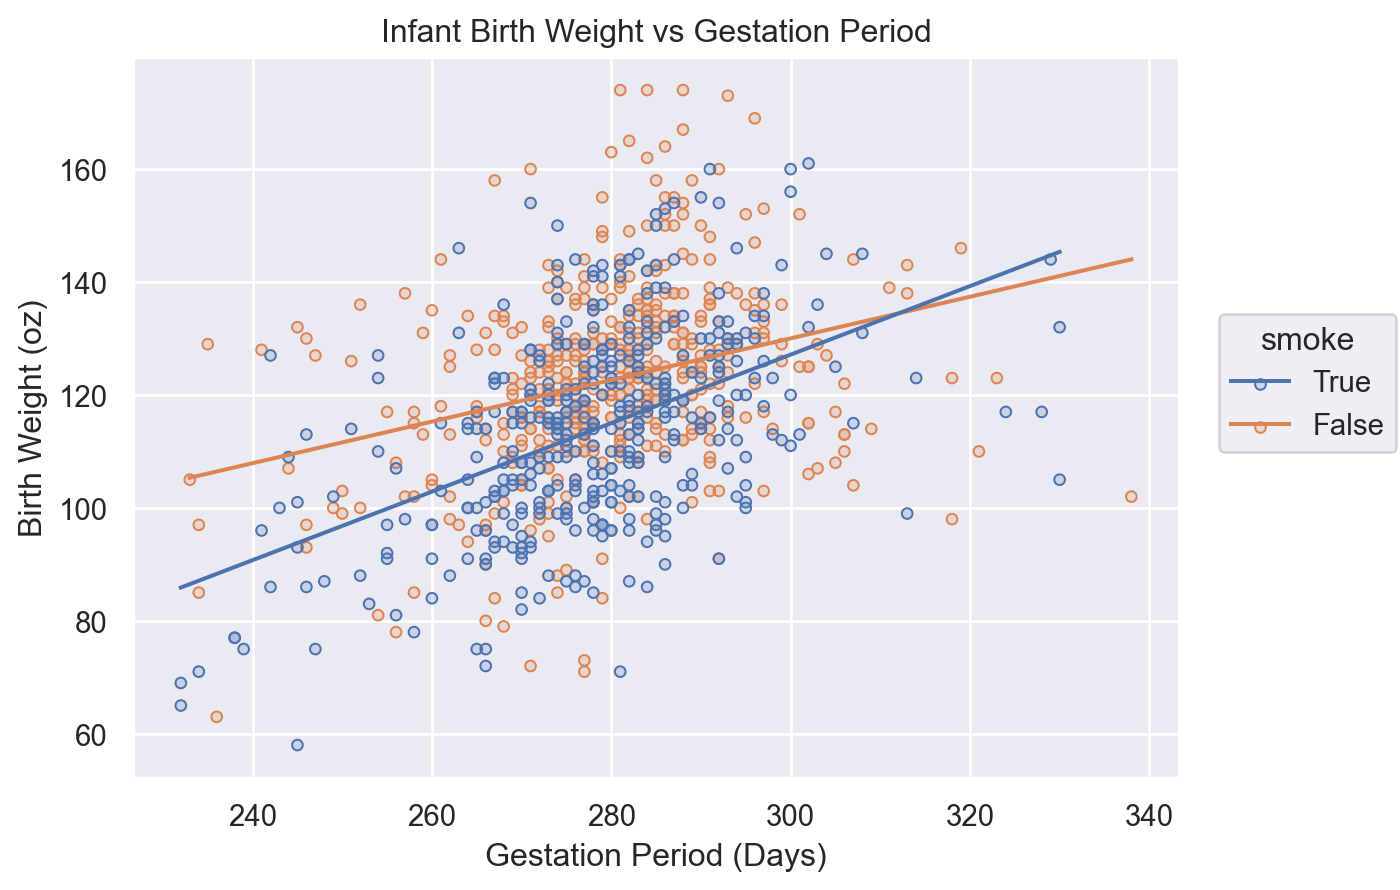

In [8]:
# Plotting
(
    so.Plot(
        df2,
        y="bwt_oz",
        x="gestation",
        color="smoke",
    )
    .add(so.Dots())
    .add(so.Lines(), so.PolyFit(order=1))
    .label(
        y="Birth Weight (oz)",
        x="Gestation Period (Days)",
        title="Infant Birth Weight vs Gestation Period",
    )
)

In [9]:
results["ex2_birth_weight_lower"] = "yes"
print(
    f"Birth weight of infants whose mothers smoked during gestation is genrally lower, however the trend seems to reverse when the gestation period is longer than about 310 days."
)

Birth weight of infants whose mothers smoked during gestation is genrally lower, however the trend seems to reverse when the gestation period is longer than about 310 days.


## Linear Regression

**PLEASE CONTINUE TO SUBSET FOR GESTATION GREATER THAN 225 DAYS for this section**

### Exercise 3
Now check this relationship using `statsmodels`. Regress birthweight on gestational period and whether the infant's mother smoked. Is your conclusion from the previous exercise confirmed? Store the coefficient for smoking in results under the key `"ex3_smoking_coefficient"`. 

*Note:* coefficients are stored in the `.params` attribute of your fit model.

*Note 2:* you may hit a problem because of the name of one of your columns. You should probably be able to guess the problem given your experience with Python. Also, if you have trouble figuring out how to access the parameters from a fitted model, check out the docs [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).


In [10]:
# Fitting Linear Regression Model
model = smf.ols("bwt_oz ~ gestation + smoke", data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bwt_oz   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     112.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.68e-44
Time:                        02:04:11   Log-Likelihood:                -3606.9
No. Observations:                 862   AIC:                             7220.
Df Residuals:                     859   BIC:                             7234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.4386     10.878     -1.235      0.217     -34.790       7.913
smoke[T.True]    -7.8784      1.090     -7.227      0.000     -10.018      -5.739
gestation         0.4860      0.039     12.544      0.000       0.410       0.562
==============================================================================
Omnibus:                        6.654   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.760
Skew:                           0.114   Prob(JB):                       0.0206
Kurtosis:                       3.405   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
results["ex3_smoking_coefficient"] = model.params["smoke[T.True]"]
print(
    f"""The coefficient for smoking is {results["ex3_smoking_coefficient"]:.2f}, which means that on a average infants whose mothers smoked during gestation are around {results["ex3_smoking_coefficient"]:.2f} ounces lighter at birth than those whose mothers did not smoke during gestation."""
)

The coefficient for smoking is -7.88, which means that on a average infants whose mothers smoked during gestation are around -7.88 ounces lighter at birth than those whose mothers did not smoke during gestation.


### Exercise 4
Now let's expand our model to also take into account mothers' pregnancy weight and race (make sure to treat race as a categorical variable!). Don't try to do any recoding of `mrace`, just turn it into a categorical. Does your interpretation of the `smoke` coefficient change? Store the new coefficient under the key `"ex4_smoking_coefficient"`.

In [12]:
model_2 = smf.ols("bwt_oz ~ gestation + mpregwt+ smoke + C(mrace)", data=df2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bwt_oz   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     24.23
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           6.80e-47
Time:                        02:04:11   Log-Likelihood:                -3580.3
No. Observations:                 862   AIC:                             7187.
Df Residuals:                     849   BIC:                             7248.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -17.3203     11.138     -1.555      0.120     -39.181       4.541
smoke[T.True]    -7.8958      1.081     -7.303      0.000     -10.018      -5.774
C(mrace)[T.1]    -1.8441      2.776     -0.664      0.507      -7.293       3.605
C(mrace)[T.2]    -5.6291      3.749     -1.502      0.134     -12.987       1.729
C(mrace)[T.3]    -0.5249      2.477     -0.212      0.832      -5.387       4.337
C(mrace)[T.4]     0.9884      2.497      0.396      0.692      -3.912       5.889
C(mrace)[T.5]    -0.6721      1.767     -0.380      0.704      -4.141       2.796
C(mrace)[T.6]     4.3084      3.235      1.332      0.183      -2.041      10.658
C(mrace)[T.7]    -6.4570      1.477     -4.372      0.000      -9.356      -3.558
C(mrace)[T.8]    -7.1764      2.849     -2.519      0.012     -12.767      -1.585
C(mrace)[T.9]    -1.9153      4.098     -0.467      0.640      -9.959       6.128
gestation         0.4417      0.039     11.441      0.000       0.366       0.517
mpregwt           0.1396      0.027      5.242      0.000       0.087       0.192
==============================================================================
Omnibus:                        8.387   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               11.377
Skew:                           0.078   Prob(JB):                      0.00338
Kurtosis:                       3.541   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
results["ex4_smoking_coefficient"] = model_2.params["smoke[T.True]"]
print(
    f"""The coefficient for smoking after taking into account the race and weight of the mother is: {results["ex4_smoking_coefficient"]:.2f}"""
)

The coefficient for smoking after taking into account the race and weight of the mother is: -7.90


### Exercise 5
Now let's test for whether there is an interaction between the mother's race and the effect of smoking. 

Note that race is coded as follows:

```
mrace    mother’s race or ethnicity
         0-5= white
         6  = mexican
         7 = black
         8 = asian
         9 = mix
         99 = unknown
```

As most variation in this data is between "white" and other categories, first recode race to be an indicator for white and non-white for easier interpretation. 

In [14]:
df3 = df2.copy()

# converting mrace to a binary variable to represent if the mother is white or not
df3["white_mom"] = df3["mrace"].apply(lambda x: True if x >= 0 and x <= 5 else False)

In [15]:
model_3 = smf.ols("bwt_oz ~ gestation + mpregwt+ smoke*C(white_mom)", data=df3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bwt_oz   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     54.81
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.91e-49
Time:                        02:04:12   Log-Likelihood:                -3587.5
No. Observations:                 862   AIC:                             7187.
Df Residuals:                     856   BIC:                             7216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -21.8908     10.949     -1.999      0.046     -43.381      -0.401
smoke[T.True]                         -8.8601      2.077     -4.267      0.000     -12.936      -4.784
C(white_mom)[T.True]                   4.3761      1.575      2.778      0.006       1.284       7.468
smoke[T.True]:C(white_mom)[T.True]     1.0069      2.421      0.416      0.678      -3.746       5.759
gestation                              0.4446      0.039     11.510      0.000       0.369       0.520
mpregwt                                0.1319      0.026      5.132      0.000       0.081       0.182
==============================================================================
Omnibus:                        8.544   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               11.787
Skew:                           0.071   Prob(JB):                      0.00276
Kurtosis:                       3.555   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 6
Now, using [post-regression test syntax](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.t_test.html) (not by running a new regression on a subpopulation), recover the coefficient and t-statistic for *whether smoking reduces birth weight for white mothers.*  Store the t-statistic of your test in `ex6_compare_white_black_tstat`.

**Hint:** Read to the BOTTOM of the post-regression test syntax documentation for how to specify hypotheses with strings.

How does this coefficient compare to that for non-white mothers? Is the reduction in birth weight associated with smoking for white mothers larger or smaller than for non-white mothers? Store your answer as either `"larger"` or `"smaller"` under the key `"ex6_compare_white_black"`.

**Note:** Please ensure your t-stat is stored as a single number, not an array or an array of arrays.

In [16]:
test = "smoke[T.True] + smoke[T.True]:C(white_mom)[T.True] =0"
t_test = model_3.t_test(test)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -7.8532      1.253     -6.266      0.000     -10.313      -5.393


In [17]:
results["ex6_compare_white_black_tstat"] = t_test.tvalue[0][0]
print(
    f"""The t-statistic for reduction in birth weight of infant and smoking habbit of mother  during gestation is: {results["ex6_compare_white_black_tstat"]:.2f}"""
)

The t-statistic for reduction in birth weight of infant and smoking habbit of mother  during gestation is: -6.27


In [18]:
results["ex6_compare_white_black"] = "smaller"
print(
    f"""Since the p-value is less than 0.05 we can conclude that smoking during gestation has an effect on the birth weight of infants with white mothers."""
)

Since the p-value is less than 0.05 we can conclude that smoking during gestation has an effect on the birth weight of infants with white mothers.


In [19]:
print(
    f"""Based on the interaction terms, reduction in birth weight of infants with white mothers is {results["ex6_compare_white_black"]} than those with black mothers."""
)

Based on the interaction terms, reduction in birth weight of infants with white mothers is smaller than those with black mothers.


### Exercise 7
Now let's use this model to predict some values. Let's generate some hypothetical newborns:

```python
newborns = pd.DataFrame(
    {
        "smoke": [1, 1, 0, 0],
        "white": [True, False, True, False],
        "gestation": [253, 300, 248, 287],
        "mpregwt": [132, 129, 140, 139],
    }
)
```

Using the model you ran above with gestation, smoke, mpregwt, white, and the interaction of white and smoke, predict birth weights for these newborns. Store your predictions **in a list** under the key `"ex7_predictions"`.

Note that if you have different data types from those in this pretend dataset or different column names from those in the dataset you used to fit your model, you’ll get an error—just adjust the column names / data types to match the data you used to fit your model.

In [20]:
# creating sample data for prediction
newborns = pd.DataFrame(
    {
        "smoke": [True, True, False, False],
        "white_mom": [True, False, True, False],
        "gestation": [253, 300, 248, 287],
        "mpregwt": [132, 129, 140, 139],
    }
)

In [21]:
results["ex7_predictions"] = list(model_3.predict(newborns))
print(f"""The predicted birth weights (in oz) of the infants are:""")
for i in results["ex7_predictions"]:
    print(f"""{i:.2f}""")

The predicted birth weights (in oz) of the infants are:
104.52
119.64
111.21
124.04


## statsmodels versus R

A quick but important note: the tools that are made available in different packages is often a function of who uses those packages, and how they use them. By and large, nearly all statisticians use R, and so many stats tools (like automatic forward-model-selection or backwards-model-selection) have "convenience implementations" (single functions that do all the things you'd want to accomplish) in R, but aren't available as convenience packages in `statsmodels`. That's because `statsmodels` was mostly written by economists and social scientists who tend to feel model selection should be a function of theory not statistical performance (not taking sides: just reporting a difference that exists). 

To be clear, you can still implement things like forward model selection yourself in Python -- just write a loop that tries different regressors and plots the resulting AICs! -- but it will often take a little more work. (Indeed, you can find examples of people [writing these loops on the web](https://planspace.org/20150423-forward_selection_with_statsmodels/)). And that's not to say that `statsmodels` doesn't have a TON of stuff (take a minute to just look over all the [examples of cool things you can do in statsmodels here](http://www.statsmodels.org/stable/examples/index.html)). Just don't be surprised if you ommissions that seem odd given what you see emphasized in stats courses. 

This is one of the reasons that languages are sticky: once a group of people have invested in adding all the bells and whistles they like to a language, there are good reasons to not move to another language, even if the other language has some advantages. A statistician who likes the basic language organization of Python more than R, for example, may still stay with R because the packages already do everything a statistician wants to do, and so it's not worth having to re-implement common tasks in a new language. 

## Logistic Regression

### Exercise 8
Now, using statsmodels, evaluate the impact of smoking on the likelihood a child is born prematurely (where "premature" is defined as gestation of *less than* 252 days).

For obvious reasons, **DO NOT USE OUR SUBSET FOR GESTATION GREATER THAN 225 DAYS** from above for this section.

For this model, please include mother’s pre-pregnancy weight, smoking status, and whether the mother is White (if you use all the racial categories, the model won’t converge). Please don’t include the interaction we used in the last question. Store the coefficient for smoking in `ex8_smoking_coefficient`.

In [22]:
df4 = df.copy()
df4["premature"] = df4["gestation"].apply(lambda x: 1 if x < 252 else 0)
df4["white_mom"] = df4["mrace"].apply(lambda x: True if x >= 0 and x <= 5 else False)
df4.sample(5)

,id,date,gestation,bwt_oz,parity,mrace,mage,med,mht,mpregwt,inc,smoke,premature,white_mom
99,798,1414,272,110,2,8,25,1,60,90,2,False,0,False
598,1596,1539,273,119,1,0,24,2,61,108,7,True,0,True
628,7486,1551,275,87,3,7,28,4,63,110,5,True,0,False
830,7646,1589,294,146,2,5,22,1,66,145,5,True,0,True
74,7684,1649,269,109,1,0,23,3,63,113,3,False,0,True


In [23]:
model_4 = smf.logit("premature ~ mpregwt + smoke + white_mom", data=df4).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.187899
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              premature   No. Observations:                  869
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            3
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                 0.04614
Time:                        02:04:12   Log-Likelihood:                -163.28
converged:                       True   LL-Null:                       -171.18
Covariance Type:            nonrobust   LLR p-value:                  0.001248
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5353      1.024     -1.499      0.134      -3.542       0.472
smoke[T.True]         0.4253      0.320      1.331      0.183      -0.201       1.052
white_mom[T.True]    -1.2247      0.320     -3.833      0.000      -1.851      -0.598
mpregwt              -0.0070      0.008     -0.907      0.364      -0.022       0.008
=====================================================================================
"""

In [24]:
results["ex8_smoking_coefficient"] = model_4.params["smoke[T.True]"]
print(
    f"""The coefficient for smoking is: {results["ex8_smoking_coefficient"]:.2f} i.e. smoking increases the odds of premature birth by {np.exp(results["ex8_smoking_coefficient"]):.2f} times."""
)

The coefficient for smoking is: 0.43 i.e. smoking increases the odds of premature birth by 1.53 times.


## Weighting

Let's now try using statsmodels on another dataset.

In our merging exercises, we ran a difference-in-difference analysis on crime in California counties to see if, following drug legalization, there was a larger decline in violent crime in counties that had previously also had high drug arrest rates (to test the idea that violence was being generated by the drug trade, and that legalization would decrease this violence).

In those analyses, we treated counties as equally-weighted units of analysis. If we think that each county is a single "community", and we think crime and arrests is shaped at the level of communities (particularly when our community division is related to administrative boundaries that impact policing and government services, and is the case with counties), then this is reasonable.

But one might think that crime is determined at the individual level, or maybe neighborhood level, and so big counties should "count more" in our analysis.

(More formally, when we are fitting a regression model that picks parameter values to minimize the overall sum of squared errors, maybe we should pick values that to a better job of minimizing the errors for populous counties at the expense of not doing quite as good a job of minimizing the errors for smaller counties)

Here, let's use weighted least squares to weight observations based on population. This will allow bigger counties to influence our estimates more.

### Exercise 9
To begin, read in our data on California arrest rates and population from [github](https://github.com/nickeubank/MIDS_Data/blob/master/arrest_rates_and_population.parquet). You will see I've reshaped the data to long format for convenience. This data is stored as a parquet file, so you'll need to install an engine (I usually use `fastparquet` to load the data).


In [25]:
drug_df = pd.read_parquet(
    "https://github.com/nickeubank/MIDS_Data/raw/master/arrest_rates_and_population.parquet"
)
drug_df.sample(5)

variable,COUNTY,year,drug_arrest_rate,total_population,violent_arrest_rate
52,Monterey County,2009,0.002388,404922.0,0.003420
24,Imperial County,2009,0.004562,160034.0,0.003743
105,Trinity County,2018,0.005753,13037.0,0.005139
32,Lake County,2009,0.004185,64756.0,0.005389
80,San Mateo County,2009,0.002119,701886.0,0.002060


In [26]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COUNTY               116 non-null    object 
 1   year                 116 non-null    int64  
 2   drug_arrest_rate     116 non-null    float64
 3   total_population     116 non-null    float64
 4   violent_arrest_rate  116 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.7+ KB


### Exercise 10
To run our difference-in-difference in a regression framework, we need both an indicator variable for observations that occur after legalization (i.e. year == 2018), and an indicator for the population we consider treated (those who had drug arrest rates above the average 2009 drug arrest rate). Re-create those here. 

As a check, store the number of counties that have a high drug arrest rate in 2009 under the key `"ex10_num_high_drug_arrest"`.

*Note:* if you want, you can also use the 2009 drug arrest rates as a continuous variable. This is a kind of "generalized difference-in-difference", in which we're just doing the continuous analogue of the thing we do when we split the sample into "high" and "low" 2009 arrest rates. 

In [27]:
# creating legal flag
drug_df["legal"] = drug_df["year"].apply(lambda x: 1 if x >= 2018 else 0)

In [28]:
# avg drug arrest rate for 2009
avg_rate = drug_df[drug_df["year"] == 2009]["drug_arrest_rate"].mean()

# creating flag for treatment based on avg drug arrest rate
drug_df["treated"] = drug_df["drug_arrest_rate"].apply(
    lambda x: 1 if x >= avg_rate else 0
)

In [29]:
results["ex10_num_high_drug_arrest"] = drug_df[
    (drug_df["treated"] == True) & (drug_df["year"] == 2009)
]["COUNTY"].count()
print(
    f"""{results["ex10_num_high_drug_arrest"]} counties had a high drug arrest rate in 2009"""
)

23 counties had a high drug arrest rate in 2009


In [30]:
# consider only these counties for analysis, redefining the dataframe
drug_df["Treated_County"] = drug_df["COUNTY"].apply(
    lambda x: 1
    if x
    in drug_df[(drug_df["treated"] == True) & (drug_df["year"] == 2009)][
        "COUNTY"
    ].values
    else 0
)

### Exercise 11

Now regression the violent arrest rate on your two indicators and their interaction. The coefficient on the interaction is your "difference-in-difference" estimate! If you go back to your old homeworks, you should find the coefficient is exactly what you calculated. Store this coefficient under the key  `"ex11_diff_in_diff"`.

In [31]:
drug_model_1 = smf.ols(
    "violent_arrest_rate ~ legal + Treated_County + legal*Treated_County",
    data=drug_df,
).fit()
drug_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     violent_arrest_rate   R-squared:                       0.100
Model:                             OLS   Adj. R-squared:                  0.076
Method:                  Least Squares   F-statistic:                     4.166
Date:                 Thu, 16 Nov 2023   Prob (F-statistic):            0.00773
Time:                         02:04:12   Log-Likelihood:                 630.00
No. Observations:                  116   AIC:                            -1252.
Df Residuals:                      112   BIC:                            -1241.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0034      0.000     18.669      0.000       0.003       0.004
legal                   -0.0002      0.000     -0.716      0.475      -0.001       0.000
Treated_County           0.0008      0.000      2.679      0.008       0.000       0.001
legal:Treated_County    -0.0002      0.000     -0.604      0.547      -0.001       0.001
==============================================================================
Omnibus:                       24.084   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.273
Skew:                           1.057   Prob(JB):                     5.95e-08
Kurtosis:                       4.554   Cond. No.                         6.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
results["ex11_diff_in_diff"] = drug_model_1.params["legal:Treated_County"]
print(f"""Diff in diff coefficient: {results["ex11_diff_in_diff"]:.2E}""")

Diff in diff coefficient: -2.47E-04


In [33]:
drug_df["treated"].value_counts()

treated
0    92
1    24
Name: count, dtype: int64

### Exercise 12
Now let's do the same analysis, but this time using county population as a weight in a Weighted Least Squares regression (`smf.wls`). Just pass the keyword argument `weights` as a vector to weights (in this case, `arrests['total_population']`). Note that the `weights` argument is *outside* the formula, so you have to pass an actual vector of values, not just the name of a column. 

Does your interpretation of the effects of drug legalization change? Store the new difference-in-difference coefficient under the key `"ex12_diff_in_diff_weighted"`.

In [34]:
drug_model_2 = smf.wls(
    "violent_arrest_rate ~ legal + Treated_County + legal*Treated_County",
    data=drug_df,
    weights=drug_df["total_population"],
).fit()
drug_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             WLS Regression Results                            
===============================================================================
Dep. Variable:     violent_arrest_rate   R-squared:                       0.396
Model:                             WLS   Adj. R-squared:                  0.380
Method:                  Least Squares   F-statistic:                     24.52
Date:                 Thu, 16 Nov 2023   Prob (F-statistic):           2.86e-12
Time:                         02:04:12   Log-Likelihood:                 608.13
No. Observations:                  116   AIC:                            -1208.
Df Residuals:                      112   BIC:                            -1197.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0028      0.000     21.484      0.000       0.003       0.003
legal                   -0.0004      0.000     -1.972      0.051      -0.001    1.76e-06
Treated_County           0.0011      0.000      5.938      0.000       0.001       0.001
legal:Treated_County    -0.0003      0.000     -1.171      0.244      -0.001       0.000
==============================================================================
Omnibus:                        6.397   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.041   Jarque-Bera (JB):               10.179
Skew:                           0.125   Prob(JB):                      0.00616
Kurtosis:                       4.429   Cond. No.                         7.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
results["ex12_diff_in_diff_weighted"] = drug_model_2.params["legal:Treated_County"]
print(f"""Diff in diff coefficient: {results["ex12_diff_in_diff_weighted"]:.2E}""")

Diff in diff coefficient: -2.88E-04


In [36]:
# view Results
results

{'ex2_birth_weight_lower': 'yes',
 'ex3_smoking_coefficient': -7.878421244482421,
 'ex4_smoking_coefficient': -7.89583525602942,
 'ex6_compare_white_black_tstat': -6.2663856310970445,
 'ex6_compare_white_black': 'smaller',
 'ex7_predictions': [104.52308427743122,
  119.6391553929331,
  111.2088102828516,
  124.03909471463471],
 'ex8_smoking_coefficient': 0.42527733978378673,
 'ex10_num_high_drug_arrest': 23,
 'ex11_diff_in_diff': -0.00024739378861355634,
 'ex12_diff_in_diff_weighted': -0.00028837095306356484}

In [37]:
# Validating Result Keys
assert set(results.keys()) == {
    "ex2_birth_weight_lower",
    "ex3_smoking_coefficient",
    "ex4_smoking_coefficient",
    "ex6_compare_white_black",
    "ex6_compare_white_black_tstat",
    "ex7_predictions",
    "ex8_smoking_coefficient",
    "ex10_num_high_drug_arrest",
    "ex11_diff_in_diff",
    "ex12_diff_in_diff_weighted",
}